# Analisis Sentimen Review Wisata Indonesia



*   Import Library



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "ReviewWisataIndonesia_Selenium_2.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,review,rating
0,25 Desember 2023Situs petirtaan yang baru pert...,5
1,"Tempat nya lumayan bersih dan sedikit luas , k...",4
2,Petirtaan era Mataram Kuno di pinggir kabupate...,5
3,"Makin bagus pengelolaannya, namun sayang bange...",5
4,Hari ini pertama kali berkunjung ke pemandian ...,4


In [6]:
df.columns = ['Review', 'Rating']
df.head()

,Review,Rating
0,25 Desember 2023Situs petirtaan yang baru pert...,5
1,"Tempat nya lumayan bersih dan sedikit luas , k...",4
2,Petirtaan era Mataram Kuno di pinggir kabupate...,5
3,"Makin bagus pengelolaannya, namun sayang bange...",5
4,Hari ini pertama kali berkunjung ke pemandian ...,4


# Preprocessing Data



1.   Cleaning the Text



In [7]:
import string
import re

def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})




2.   Adding additional features - length of, and percentage of punctuations in the text



In [8]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Review,Rating,cleaned_text,label,Review_len,punct
0,25 Desember 2023Situs petirtaan yang baru pert...,5,desember situs petirtaan yang baru pert...,1,151,0.7
1,"Tempat nya lumayan bersih dan sedikit luas , k...",4,tempat nya lumayan bersih dan sedikit luas k...,1,143,1.4
2,Petirtaan era Mataram Kuno di pinggir kabupate...,5,petirtaan era mataram kuno di pinggir kabupate...,1,293,2.7
3,"Makin bagus pengelolaannya, namun sayang bange...",5,makin bagus pengelolaannya namun sayang bange...,1,111,1.8
4,Hari ini pertama kali berkunjung ke pemandian ...,4,hari ini pertama kali berkunjung ke pemandian ...,1,106,3.8




3.   Tokenization



In [9]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Review,Rating,cleaned_text,label,Review_len,punct,tokens
0,25 Desember 2023Situs petirtaan yang baru pert...,5,desember situs petirtaan yang baru pert...,1,151,0.7,"[desember, situs, petirtaan, yang, baru, perta..."
1,"Tempat nya lumayan bersih dan sedikit luas , k...",4,tempat nya lumayan bersih dan sedikit luas k...,1,143,1.4,"[tempat, nya, lumayan, bersih, dan, sedikit, l..."
2,Petirtaan era Mataram Kuno di pinggir kabupate...,5,petirtaan era mataram kuno di pinggir kabupate...,1,293,2.7,"[petirtaan, era, mataram, kuno, di, pinggir, k..."
3,"Makin bagus pengelolaannya, namun sayang bange...",5,makin bagus pengelolaannya namun sayang bange...,1,111,1.8,"[makin, bagus, pengelolaannya, namun, sayang, ..."
4,Hari ini pertama kali berkunjung ke pemandian ...,4,hari ini pertama kali berkunjung ke pemandian ...,1,106,3.8,"[hari, ini, pertama, kali, berkunjung, ke, pem..."




4.   Lemmatization and Removing Stopwords



In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Mengambil stopwords untuk bahasa Indonesia
stopwords_indonesia = stopwords.words('indonesian')

# Melakukan pengecekan apakah 'tidak' ada dalam daftar stopwords
if 'tidak' in stopwords_indonesia:
    stopwords_indonesia.remove('tidak')
else:
    print("'tidak' tidak ada dalam daftar stopwords untuk bahasa Indonesia.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(stopwords_indonesia)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Review,Rating,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,25 Desember 2023Situs petirtaan yang baru pert...,5,desember situs petirtaan yang baru pert...,1,151,0.7,"[desember, situs, petirtaan, yang, baru, perta...",desember situs petirtaan kunjungi kolam kedala...
1,"Tempat nya lumayan bersih dan sedikit luas , k...",4,tempat nya lumayan bersih dan sedikit luas k...,1,143,1.4,"[tempat, nya, lumayan, bersih, dan, sedikit, l...",nya lumayan bersih luas kolamnya bagiankondisi...
2,Petirtaan era Mataram Kuno di pinggir kabupate...,5,petirtaan era mataram kuno di pinggir kabupate...,1,293,2.7,"[petirtaan, era, mataram, kuno, di, pinggir, k...",petirtaan era mataram kuno pinggir kabupaten m...
3,"Makin bagus pengelolaannya, namun sayang bange...",5,makin bagus pengelolaannya namun sayang bange...,1,111,1.8,"[makin, bagus, pengelolaannya, namun, sayang, ...",bagus pengelolaannya sayang banget pohon perin...
4,Hari ini pertama kali berkunjung ke pemandian ...,4,hari ini pertama kali berkunjung ke pemandian ...,1,106,3.8,"[hari, ini, pertama, kali, berkunjung, ke, pem...",kali berkunjung pemandian air hangat candi umb...


# EDA

In [13]:

#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 300 rows and 8 columns
rating 1.0 = 17 rows
rating 2.0 = 17 rows
rating 3.0 = 76 rows
rating 4.0 = 74 rows
rating 5.0 = 116 rows


Number of null in label: 0
Number of null in text: 0


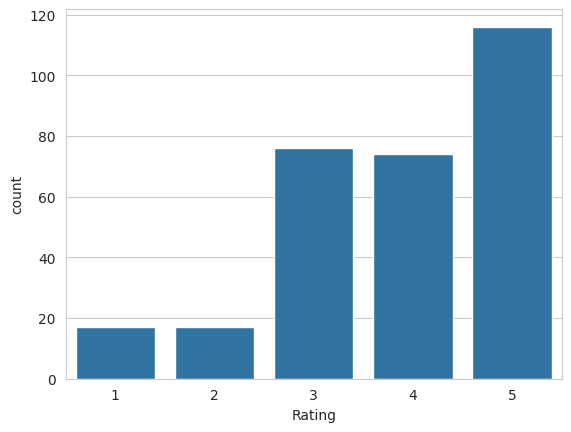

In [14]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum()}")
sns.countplot(x='Rating', data=df);

# Visualizing Word Clouds

In [15]:
from wordcloud import WordCloud

In [16]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

# Word Cloud: Positive Reviews

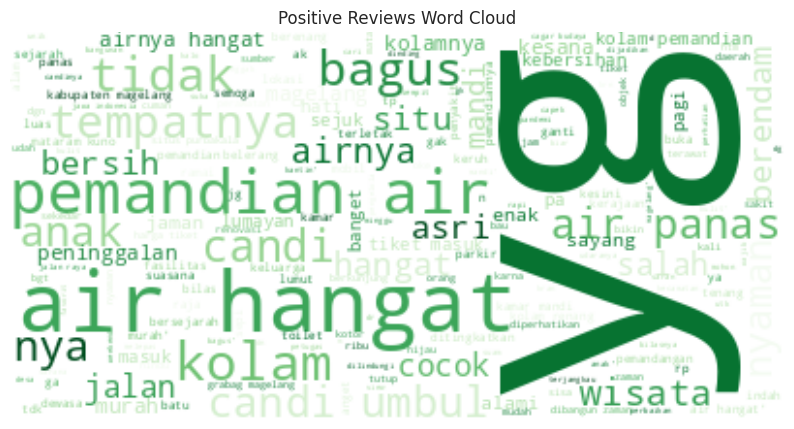

In [17]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()


# Word Cloud: Negative Reviews

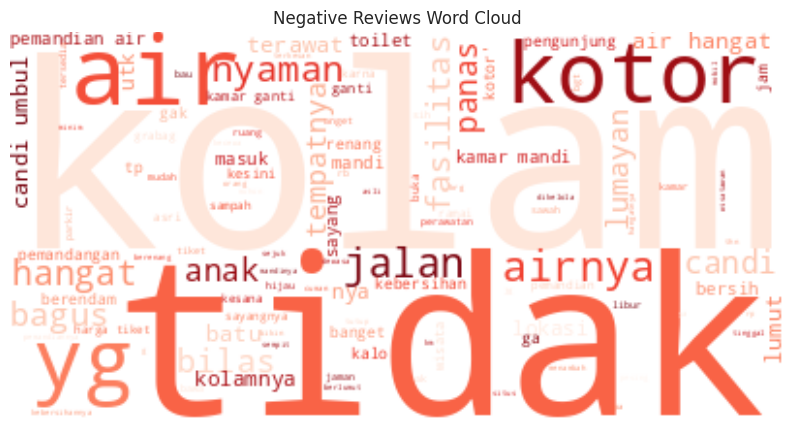

In [18]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# Feature Extraction from Text



*   Vectorizer : TF-IDF



In [58]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(300, 3)
(300,)


In [59]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(240, 3)
(60, 3)
(240,)
(60,)


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()



,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343
0,177,1.7,0.0,0.0,0.105663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.266047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122526,0.0,0.251316,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.251316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.229762,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.201652,0.0,0.0,0.0,0.163883,0.0,0.0,0.0,0.193825,0.0,0.000000,0.0,0.315711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.275082,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315711,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.298849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275082,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201652,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,169,3.6,0.0,0.0,0.217442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252235,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.294039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324848,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.572698,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.283043,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.265693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [61]:
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

In [62]:
print(X_train_vect.dtypes)
print(X_test_vect.dtypes)


Review_len      int64
punct         float64
0             float64
1             float64
2             float64
               ...   
339           float64
340           float64
341           float64
342           float64
343           float64
Length: 346, dtype: object
Review_len      int64
punct         float64
0             float64
1             float64
2             float64
               ...   
339           float64
340           float64
341           float64
342           float64
343           float64
Length: 346, dtype: object


# Visualize Confusion Matrix



*   Vectorizer : TF-IDF



In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Algoritma : Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.50      0.18      0.26        17
           1       0.74      0.93      0.82        43

    accuracy                           0.72        60
   macro avg       0.62      0.55      0.54        60
weighted avg       0.67      0.72      0.66        60



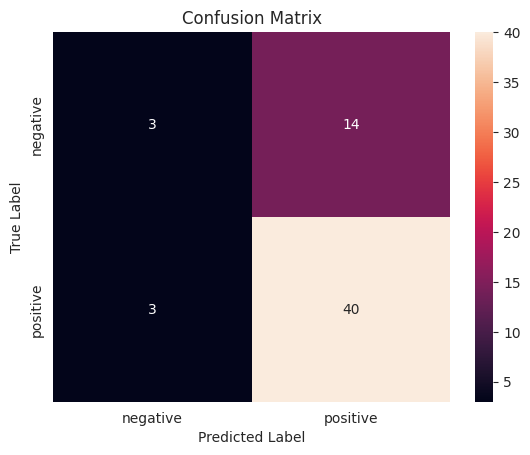

In [64]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritma: Random Forest Classifier

              precision    recall  f1-score   support

           0       0.43      0.18      0.25        17
           1       0.74      0.91      0.81        43

    accuracy                           0.70        60
   macro avg       0.58      0.54      0.53        60
weighted avg       0.65      0.70      0.65        60



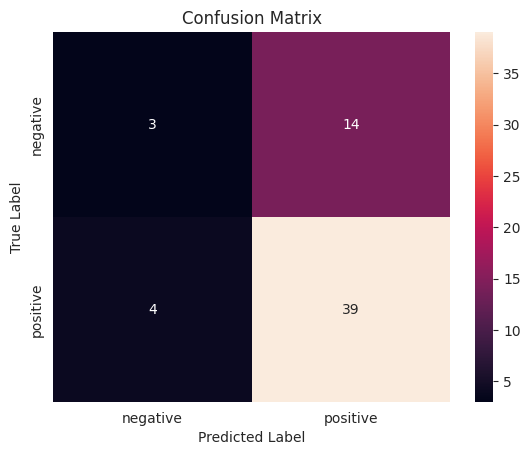

In [65]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Algoritma: Logistic Regression

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        17
           1       0.76      0.91      0.83        43

    accuracy                           0.73        60
   macro avg       0.66      0.60      0.61        60
weighted avg       0.71      0.73      0.70        60



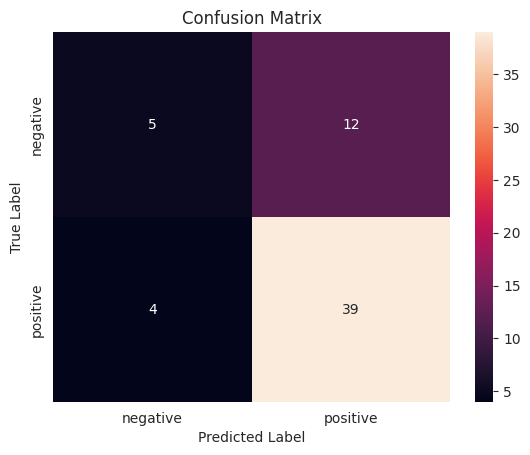

In [66]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritma: Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.77      0.86      0.81        43

    accuracy                           0.72        60
   macro avg       0.64      0.61      0.61        60
weighted avg       0.69      0.72      0.70        60



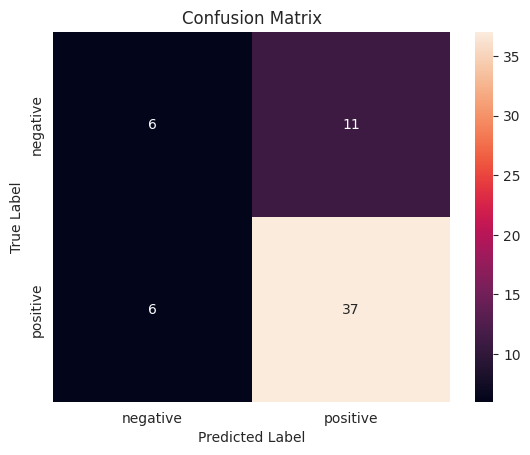

In [67]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritma: K-Nearest Neighbor (KNN)

              precision    recall  f1-score   support

           0       0.14      0.18      0.16        17
           1       0.64      0.58      0.61        43

    accuracy                           0.47        60
   macro avg       0.39      0.38      0.38        60
weighted avg       0.50      0.47      0.48        60



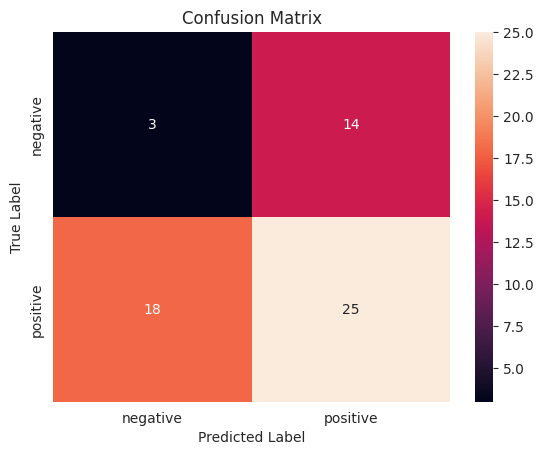

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Algoritma: Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        17
           1       0.76      0.88      0.82        43

    accuracy                           0.72        60
   macro avg       0.63      0.59      0.59        60
weighted avg       0.69      0.72      0.69        60



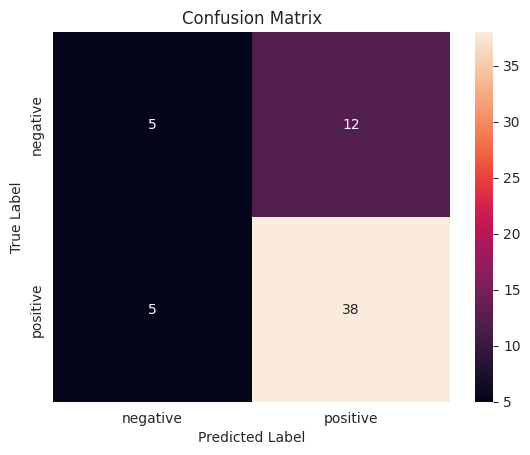

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Performing K-Fold Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.6458333333333333 
 precision - 0.6403601642446036 
 recall - 0.9733333333333334 
 f1 - 0.7711192855155703 

Logistic Regression
 accuracy - 0.6833333333333333 
 precision - 0.68060754653432 
 recall - 0.9185714285714287 
 f1 - 0.7798811846605964 

Random Forest
 accuracy - 0.6625 
 precision - 0.6618194997297164 
 recall - 0.8652380952380951 
 f1 - 0.7703076030021002 

SVM
 accuracy - 0.6958333333333334 
 precision - 0.7199165050635639 
 recall - 0.8442857142857143 
 f1 - 0.7730317097513492 

KNN
 accuracy - 0.5125000000000001 
 precision - 0.585084547375569 
 recall - 0.6728571428571428 
 f1 - 0.6221235601425191 

Extra Trees
 accuracy - 0.6833333333333333 
 precision - 0.7037537943652495 
 recall - 0.8447619047619048 
 f1 - 0.7642434202419971 



# Predictions



*   Vectorizer: TF-IDF
*   Algoritma: Extra Trees Classifier



In [73]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.6833333333333333

In [76]:
data = ["kotor", "Bagus", "Aku tidak suka tempat ini, karena air kotor tidak bersih", "Tempatnya nyaman, airnya hangat, enak banget buat nyantai"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 0 1]
